# Stock Market Prediction And Forecasting Using Stacked LSTM

## Data Scrapping

In [ ]:
### Data Collection
import pandas_datareader as pdr
key="0d1ba115ceb75c7e5255bc6c89bbe509c08d0e38"

In [ ]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

/usr/local/lib/python3.7/dist-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [ ]:
import pandas as pd
import plotly.express as px
import numpy as np
import tensorflow as tf
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
df.to_csv('AAPL.csv')
df=pd.read_csv('AAPL.csv')

In [ ]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2017-10-26 00:00:00+00:00,157.41,157.8295,156.78,157.23,16751691,37.346049,37.445577,37.196579,37.303343,67006764,0.0,1.0
1,AAPL,2017-10-27 00:00:00+00:00,163.05,163.6000,158.70,159.29,43904150,38.684158,38.814647,37.652106,37.792085,175616600,0.0,1.0
2,AAPL,2017-10-30 00:00:00+00:00,166.72,168.0700,163.72,163.89,43923292,39.554877,39.875169,38.843117,38.883450,175693168,0.0,1.0
3,AAPL,2017-10-31 00:00:00+00:00,169.04,169.6499,166.94,167.90,35474672,40.105305,40.250006,39.607073,39.834836,141898688,0.0,1.0
4,AAPL,2017-11-01 00:00:00+00:00,166.89,169.9400,165.61,169.87,33100847,39.595210,40.318833,39.291526,40.302225,132403388,0.0,1.0


In [ ]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2022-10-18 00:00:00+00:00,143.75,146.7000,140.610,145.490,99136610,143.75,146.7000,140.610,145.490,99136610,0.0,1.0
1253,AAPL,2022-10-19 00:00:00+00:00,143.86,144.9492,141.500,141.690,61758340,143.86,144.9492,141.500,141.690,61758340,0.0,1.0
1254,AAPL,2022-10-20 00:00:00+00:00,143.39,145.8900,142.650,143.020,64521989,143.39,145.8900,142.650,143.020,64521989,0.0,1.0
1255,AAPL,2022-10-21 00:00:00+00:00,147.27,147.8479,142.649,142.870,86548609,147.27,147.8479,142.649,142.870,86548609,0.0,1.0
1256,AAPL,2022-10-24 00:00:00+00:00,149.45,150.2300,146.000,147.185,75981918,149.45,150.2300,146.000,147.185,75981918,0.0,1.0


In [ ]:
fig = px.line(df, x='date', y="close",title='Apple stock')
fig.show()

In [ ]:
df1=df[['date','close']]
df1.sort_values(by='date', inplace=True)
df1.set_index('date',inplace=True)
df1

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,close
date,
2017-10-26 00:00:00+00:00,157.41
2017-10-27 00:00:00+00:00,163.05
2017-10-30 00:00:00+00:00,166.72
2017-10-31 00:00:00+00:00,169.04
2017-11-01 00:00:00+00:00,166.89
...,...
2022-10-18 00:00:00+00:00,143.75
2022-10-19 00:00:00+00:00,143.86
2022-10-20 00:00:00+00:00,143.39


## Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(817, 440)

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

## LSTM Model

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss=tf.losses.MeanAbsoluteError(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=[tf.metrics.MeanSquaredError()])

# fit
er_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, restore_best_weights=True)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:

model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1,callbacks=er_cb)

Epoch 1/100
12/12 [==============================] - 7s 202ms/step - loss: 0.1314 - mean_squared_error: 0.0388 - val_loss: 0.0232 - val_mean_squared_error: 7.4372e-04
Epoch 2/100
12/12 [==============================] - 1s 116ms/step - loss: 0.0608 - mean_squared_error: 0.0130 - val_loss: 0.0166 - val_mean_squared_error: 3.9933e-04
Epoch 3/100
12/12 [==============================] - 1s 117ms/step - loss: 0.0433 - mean_squared_error: 0.0125 - val_loss: 0.0205 - val_mean_squared_error: 6.4775e-04
Epoch 4/100
12/12 [==============================] - 1s 117ms/step - loss: 0.0357 - mean_squared_error: 0.0093 - val_loss: 0.0152 - val_mean_squared_error: 3.4623e-04
Epoch 5/100
12/12 [==============================] - 1s 117ms/step - loss: 0.0327 - mean_squared_error: 0.0093 - val_loss: 0.0136 - val_mean_squared_error: 2.7772e-04
Epoch 6/100
12/12 [==============================] - 1s 116ms/step - loss: 0.0345 - mean_squared_error: 0.0081 - val_loss: 0.0180 - val_mean_squared_error: 5.1316e-0

In [ ]:
import tensorflow as tf

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 22ms/step


In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

231.85171639751934

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

155.97777457829176

## Forecast

In [ ]:
import matplotlib.pyplot as plt

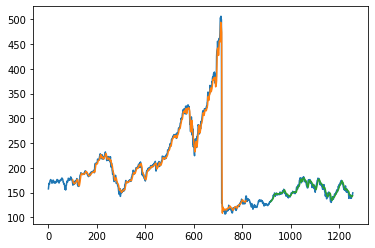

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot,)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
present_value=test_predict[-1][0]
present_value

143.4939

In [ ]:
x_input=test_data[341:].reshape(1,-1)


In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<7):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1,99,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
df3=scaler.inverse_transform(df3)

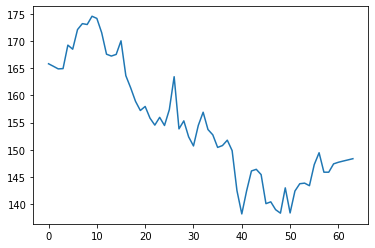

In [ ]:

plt.plot(df3[1200:])

In [ ]:
forecast=scaler.inverse_transform(lst_output)
forecast

array([[145.8721968 ],
       [145.8721968 ],
       [147.40211884],
       [147.69916384],
       [147.92424923],
       [148.13666263],
       [148.35385628]])

# Stock News Sentiment Analysis

In [ ]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt

finviz_url = 'https://finviz.com/quote.ashx?t='
tickers = ['AAPL']

news_tables = {}
for ticker in tickers:
    url = finviz_url + ticker

    req = Request(url=url, headers={'user-agent': 'my-app'})
    response = urlopen(req)

    html = BeautifulSoup(response, features='html.parser')
    news_table = html.find(id='news-table')
    news_tables[ticker] = news_table

parsed_data = []

for ticker, news_table in news_tables.items():

    for row in news_table.findAll('tr'):
      try:

        title = row.a.text
        date_data = row.td.text.split(' ')
        if len(date_data) == 1:
            time = date_data[0]
        else:
            date = date_data[0]
            time = date_data[1]

        parsed_data.append([ticker, date, time, title])
      except:
        pass

df = pd.DataFrame(parsed_data, columns=['ticker', 'date', 'time', 'title'])
df

,ticker,date,time,title
0,AAPL,Oct-25-22,12:36AM,PRESS DIGEST- Wall Street Journal - Oct 25
1,AAPL,Oct-24-22,09:33PM,"Dow Jones Rallies 400 Points, What To Do Now; ..."
2,AAPL,Oct-24-22,08:23PM,Apple CEO Tim Cook Gets Roasted For How He Did...
3,AAPL,Oct-24-22,07:08PM,Apple Plans to Quietly Give You More Ads
4,AAPL,Oct-24-22,07:07PM,UK regulator warns over Big Techs growing inte...
...,...,...,...,...
95,AAPL,Oct-18-22,11:04PM,Global Smartphone Demand Continues Fall as Eco...
96,AAPL,Oct-18-22,05:45PM,Apple (AAPL) Gains But Lags Market: What You S...
97,AAPL,Oct-18-22,04:41PM,Apple Rounds Out Holiday Lineup With New iPads...
98,AAPL,Oct-18-22,04:15PM,Foxconn Wants To Make Tesla Cars After Fisker ...


In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

## Sentiment Identification

In [ ]:
vader = SentimentIntensityAnalyzer()

f = lambda title: vader.polarity_scores(title)['compound']
df['compound'] = df['title'].apply(f)
df['date'] = pd.to_datetime(df.date).dt.date


<Figure size 720x576 with 0 Axes>

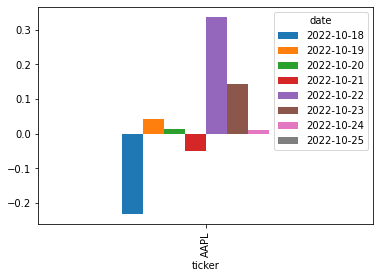

In [ ]:

plt.figure(figsize=(10,8))
mean_df = df.groupby(['ticker', 'date']).mean().unstack()
mean_df = mean_df.xs('compound', axis="columns")
mean_df.plot(kind='bar')
plt.show()

In [ ]:
results=mean_df.transpose()
results['sentiment']=results['AAPL'].apply(lambda x: 1 if x >0.1  else (-1 if x < 0 else 0))
results

ticker,AAPL,sentiment
date,,
2022-10-18,-0.233380,-1
2022-10-19,0.041146,0
2022-10-20,0.012508,0
2022-10-21,-0.050273,-1
2022-10-22,0.337867,1
2022-10-23,0.143700,1
2022-10-24,0.010823,0
2022-10-25,0.000000,0


# Inference

In [ ]:
def inference(present_value,forecasted_list,results):
  increase=0
  decrease=0
  positive=0
  negative=0
  for i in forecasted_list:
    if i[0]-present_value >0:
      increase+=1
    else:
      decrease+=1 
    if increase>decrease:
      price_suggestion='invest'
    else:
      price_suggestion='may be risk'
  if results.sentiment.value_counts()[1]>results.sentiment.value_counts()[-1]:
    news_suggestion='invest'
  else:
    news_suggestion='may be risk'
  if price_suggestion==news_suggestion:
    suggestion=news_suggestion
  else:
    suggestion='may be risk'
  print('Stock investion suggestion for APPLE is',suggestion)
inference(present_value,forecast,results)  

Stock investion suggestion for APPLE is may be risk
